# Divergence and Deviance

##### Keywords: KL-Divergence, Jensen's inequality, likelihood, log-likelihood, deviance, entropy, cross-entropy, likelihood-ratio, probabilistic modeling

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

//anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Contents
{:.no_toc}
* 
{: toc}

## The problem of learning

We've seen cross-validation as a way of minimizing a loss (cost, error, or risk) on the training set, and then obtaining the final model on our validation set, with the possible fitting of a hyperparameter. 

What we have done here is, to choose a particular model from a hypothesis set, based on a cost minimization criterion.

The basic idea in doing that was to find the out-of-sample, or population loss. Since we showed that we can bound it to within the validation (and test) loss using Hoeffding's inequality, we can use the latter losses as proxy.

And we have wanted to avoid overfitting, which is, as McElreath calls it, the tendency of the model to get over-excited by the training sample.

We also seen regularization in this context. In this case we choose a more complex model than we would have otherwise, but use cross-validation on a changed cost function which then bounds the set of admissible functions from the more complex model.

We also saw these issues in the context of supervized learning, where we were trying to solve a classification or regression problem.

In the realm of probabilistic models, both supervized learning and unsupervized learning boil down to probability density estimation. For supervized learning we want to find $p(y\vert x)$ or $p(x,y)$ and in unsupervized learning, we wish to find $p(x)$.

In these cases, the problem could be cast in the following form: suppose nature has a true "population" distribution $p(x)$. As usual I am given a sample, and make my effort learning a distribution from this sample, $q(x)$. Our question then is: how good did i do? And what additional uncertainty did I introduce by using $q$ instead of $p$?

## Information Theory: KL Divergence

In other words, if $p$ is nature's distribution, we want to know how far we are from "perfect accuracy" by using $q$. In other words we need to develop a distance scale for distances between distributions. 

This scale is called the Kullback-Leibler (KL) Divergence, introduced in 1951. It is defined thus:

$$\renewcommand{\kld}{D_{KL}}$$

$$\kld(p, q) = E_p[log(p) - log(q)] = E_p[log(p/q)] = \sum_i p_i log(\frac{p_i}{q_i}) \,\,or\, \int dP log(\frac{p}{q})$$

The distance between a distribution and itself is clearly $\kld(p,p) = 0$.

We can use Jensen's inequality for expectations on a convex function $f(x)$, 

$$ E[f(X)] \ge f(E[X]) $$

to show that $\kld(p,q) \ge 0$ with equality iff (if and only if) $q=p$.

$$\kld(p,q) = E_p[log(p/q)] = E_p[-log(q/p)] \ge -\log \left( E_p[q/p] \right) = -\log(\int dQ) = 0$$

where we have used the fact that $-log(x)$ is a convex function, and that $q(x)$ normalizes to a distribution. Infact, since $-\log(x)$ is strictly convex, the equality only happens if $q(x) = p(x)$ for ALL x.

Thus we can interpret the Kullback-Leibler divergence as a measure of the dissimilarity of the two distributions p(x) and q(x). In frequentist statistics, the KL-divergence is related to the maximum likelihood, in Bayesian statistics the KL divergence can be used as a measure of the information gain in moving from a prior to posterior (with a common goal in Bayesian experimental design to maximise the expected KL divergence between the prior and the posterior). The divergence is also used to understand mutual information in clustering, and in variational bayesian inference.

### A simple example

Consider a Bernoulli distribution with probability parameter $p=0.3$. This is a discrete distribution, defined at 0 and 1. Consider using another Bernoulli with parameter $q$ to approximate it. You can see that the divergence is 0 for $q=0.3$ and always higher for any other $q$.

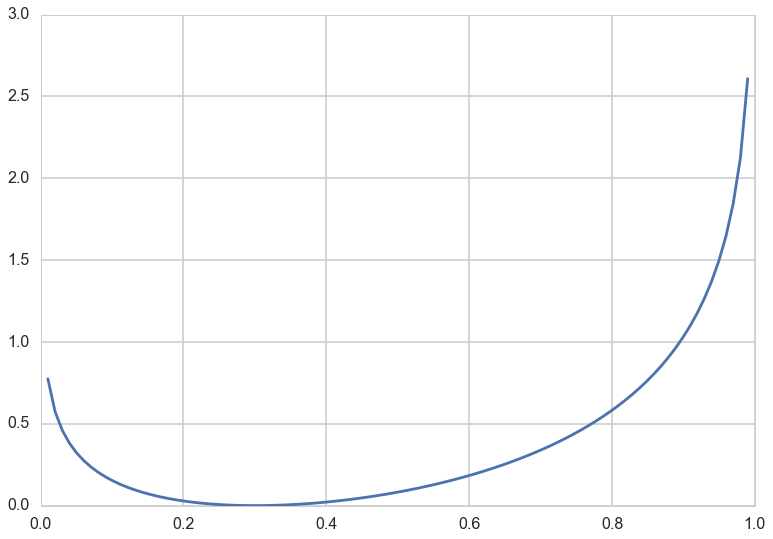

In [37]:
p=0.3

def kld(p,q):
    return p*np.log(p/q) + (1-p)*np.log((1-p)/(1-q))

qs=np.linspace(0,1,100)
plt.plot(qs, [kld(0.3,q) for q in qs]);

### Relationship to Entropy

If one defines the Cross-Entropy:

$$H(p, q) = - E_p[log(q)]$$

Then one can write:

$$\kld(p, q) = H(p,q) - H(p) $$

So one can think of the KL-Divergence as the additional entropy introduced by using $q$ instead of $p$.

Notice that $H(p,q)$ and $\kld(p, q)$ is not symmetric. This is by design, and indeed is important. The interpretation is that if you use a unusual , low entropy distribution to approximate a usual one, you will be more surprised than if you used a high entropy, many choices one to approximate an unusual one. An example from McElreath provides some intuition: if you went to Mars from Earth you would be less suprised than  the other way: Martians have only seen very dry..we've seen it all.

A corollary here is that if we use a high entropy distribution to aproximate the true one, we will incur lesser error.

##  Likelihoods and model comparison

When we minimize risk or maximize likelihood, we do it by taking a sum of risks on a point wise basis, or by multiplying likelihood distributions on  a point wise basis.

We have not really justified that yet, but we do it because its (a) intuitive and (b) we have an intuitive justification at the back of our mind of using the law of large numbers on a sample.

That is, we approximate the true population distribution $p$ by a sample-based empirical distribution:

$$\hat{p} = \frac{1}{N}\sum_i \delta (x - x_i),$$

where we have used the dirac delta function. This is just another way of replacing population integrals by sample sums or averages.

The point here is that we dont know $p$, or else why would be doing this in the first place?

### Maximum Likelihood justification

$$\kld(p, q) = E_p[log(p/q)] = \frac{1}{N}\sum_i (log(p_i) - log(q_i)$$

Thus minimizing the KL-divergence involves maximizing $\sum_i log(q_i)$ which is exactly the log likelihood. Hence we can justify the maximum likelihood principle.

### Comparing Models

By the same token we can use the KL-Divergences of two different models to do model comparison:

$$\kld(p, q) -\kld(p, r) = H(p, q) - H(p, r) = E_p[log(r) - log(q)] = E_p[log(\frac{r}{q})]$$

In the sample approximation we have:

$$\kld(p, q) -\kld(p, r) = \frac{1}{N} \sum_i log(\frac{r_i}{q_i}) = \frac{1}{N} log(\frac{\prod_i r_i}{\prod_i q_i}) =  \frac{1}{N}log(\frac{\cal{L}_r}{\cal{L}_q})$$

This ratio inside the brackets on the right is the likelihood ratio and  is used to test goodness of fit. You can read more about it in Wasserman.

## From Divergence to Deviance

If you look at the expression above, you notice that to compare a model with distribution $r$ to one with distribution $q$, you only need the sample averages of the logarithm of $r$ and $q$:

$$\kld(p, q) -\kld(p, r) = \langle log(r) \rangle - \langle log(q) \rangle$$

where the angled brackets mean sample average. If we define the deviance:

$$D(q) = -2 \sum_i log(q_i)$$,

then

$$\kld(p, q) -\kld(p, r) = \frac{2}{N} (D(q) - D(r))$$

so that we can use the deviance's for model comparison instead. Indeed, this is what we will do, starting in the frequentist realm and moving onto the bayesian realm.

Notice that deviance is just a  negative log likelihood, or risk.

(Notice that even though we used likelihoods in the last section, I have been vague about the word distribution here. In Bayesian stats we use the posterior averaged likelihood distribution (posterior predictive) instead to do such comparisons.)

### But we are still in-sample

We spent a lot of time in machine learning figuring out how to learn out of sample. However, all the machinery developed here has made no mention of it. When we use the empirical distribution and sample quantities here we are working with our training sample.

Clearly we can calculate deviance on the validation and test samples as well to remedy this issue. And the results will be similar to what we found with machine learning, with the training deviance decreasing with complexity and the testing deviance increasing. McElreath has a plot of this for data generated from a gaussian with standard deviation 1 and means:

$$\mu_i = 0.15 x_{1,i} - 0.4 x_{2,i}$$

The deviances in-sample and out-of sample, at 10,000 simulations for each model type, for two sample sizes are shown below.

![](images/inoutdeviance.png)

Notice:

- the best fit model may not be the original generating model. Remember that the choice of fit depends on the amount of data you have and the less data you have, the less parameters you should use
- on average, out of sample deviance must be larger than in-sample deviance, through an individual pair may have that order reversed because of sample peculiarity.

Now when one plots the mean deviances together, we see an interesting phenomenon:

![](images/devianceaic.png)

The test set deviances are $2*p$ above the training set ones, approximately, where $p$ is the number of parameters in the model.

This observation leads to an estimate of the out-of-sample deviance by what is called an **information criterion**, the Akake Information Criterion, or AIC:

$$AIC = D_{train} + 2p$$

which does carry as an assumption the notion that the likelihood is approximately multivariate gaussian, which as we have seen will be true near its peak. 

This is just a penalized log-likelihood or risk if we choose to identify our distribution with the likelihood, and at higher numbers of parameters, increases the out-of-sample deviance, making them less desirable. In a sense, this penalization is a simple form of regularization on our model.

We wont derive the AIC here, but if you are interested, see  http://www.stat.cmu.edu/~larry/=stat705/Lecture16.pdf

Why would we want to use such information criteria? Cross validation can be expensive, especially with multiple hyper-parameters.
We will have more to say about informatiom criterion when we figure how to do model selection in the bayesian context.